In [1]:
import pandas as pd
#Pre-Processing : Assign column header
dataset_airports=pd.read_csv("A:/dv/lab/lab7/dataset_lab7_airports.csv",header=None,dtype=str)
dataset_airports.columns=["id","name","city","country","code","icao","latitude","longtitude","altitude","offset","dst","timezone"]
dataset_airlines=pd.read_csv("A:/dv/lab/lab7/dataset_lab7_airlines.csv",header=None,dtype=str)
dataset_airlines.columns=["id","name","alias","iata","icao","callsign","country","active"]
dataset_routes=pd.read_csv("A:/dv/lab/lab7/dataset_lab7_routes.csv",header=None,dtype=str)
dataset_routes.columns=["airline","airline_id","source","source_id","dest","dest_id","codeshare","stops","equipment"]
dataset_routes=dataset_routes[dataset_routes["airline_id"]!='\\N']

#Make histogram for route length, bin the values into ranges and count how many routes fall into each range

#using haversine distance which calates distance between latitude and longtitude pairs
import math
def haversine(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2=[float(lon1),float(lat1),float(lon2),float(lat2)]
    lon1,lat1,lon2,lat2=map(math.radians,[lon1,lat1,lon2,lat2])
    dist_lon=lon2-lon1
    dist_lat=lat2-lat1
    x=math.sin(dist_lat/2)**2+math.cos(lat1)*math.cos(lat2)*math.sin(dist_lon/2)**2
    y=2*math.asin(math.sqrt(x))
    km=6367*y
    return km
def calc_dist(row):
    dist=0
    try:
        source=dataset_airports[dataset_airports["id"]==row["source_id"]].iloc[0]
        dest=dataset_airports[dataset_airports["id"]==row["dest_id"]].iloc[0]
        dist=haversine(dest["longtitude"],dest["latitude"],source["longtitude"],source["latitude"])
    except(ValueError,IndexError):
        pass
    return dist
route_lengths=dataset_routes.apply(calc_dist,axis=1)

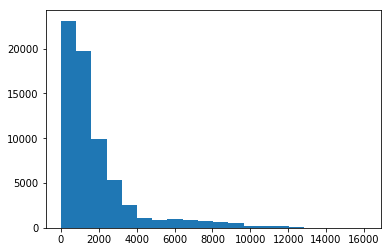

In [13]:
import matplotlib.pyplot as plt
plt.hist(route_lengths,bins=20)
plt.show()

<BarContainer object of 547 artists>

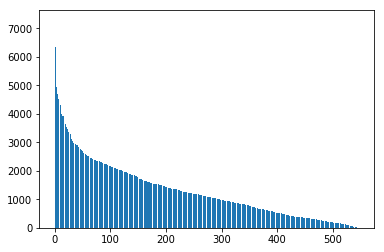

In [11]:
import numpy
route_length_df=pd.DataFrame({"length":route_lengths,"id":dataset_routes["airline_id"]})
airline_route_lengths=route_length_df.groupby("id").aggregate(numpy.mean)
airline_route_lengths=airline_route_lengths.sort_values("length",ascending=False)
plt.bar(range(airline_route_lengths.shape[0]),airline_route_lengths["length"])

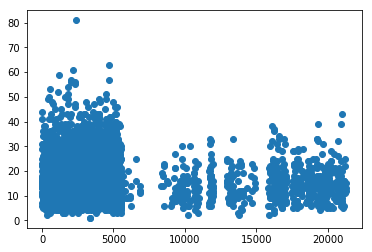

In [12]:
name_lengths=dataset_airlines["name"].apply(lambda x: len(str(x)))
plt.scatter(dataset_airlines["id"].astype(int),name_lengths)